# Hands-on: Basic Least Squares Fit with Gaussian constraint on a parameter 

Fitting example using iminuit (https://iminuit.readthedocs.io). iminuit can be installed with ` pip install iminuit`. [Minuit](https://en.wikipedia.org/wiki/MINUIT) is a robust numerical minimization program written by CERN physicist Fred James in 1970s. It is widely used in particle physics.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from pprint import pprint

### Read data from text file

In [22]:
xd, yd, yd_err = np.loadtxt("../data/basic_chi2_fit_data.txt", delimiter=",", unpack=True)

In [23]:
# Print data (as colums) to see what we read in:
for v in zip(xd, yd, yd_err):
    print(v)

(1.0, 1.7, 0.5)
(2.0, 2.3, 0.3)
(3.0, 3.5, 0.4)
(4.0, 3.3, 0.4)
(5.0, 4.3, 0.6)


### Define fit function

In [24]:
def f(x, a0, a1):
    return a0 + a1*x

### Define $\chi^2$ function

Minuit finds the minimum of a multi-variate function. We need to define a $\chi^2$ function which is then minimized by iminuit.

In [25]:
def chi2(a0, a1):
    fy = f(xd, a0, a1)
    diffs = (yd - fy) / yd_err
    return np.sum(diffs**2)

### Initialize minuit and perform the fit

In [26]:
m = Minuit(chi2, a0=1, a1=0.5, error_a0=0.01, error_a1=0.01, errordef=1)

In [27]:
m.migrad()

------------------------------------------------------------------
| FCN = 2.296                   |      Ncalls=30 (30 total)      |
| EDM = 3.9e-23 (Goal: 0.0002)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a0   |    1.2    |    0.5    |            |            |         |         |       |
| 1 | a1   |   0.61    |   0.15    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [28]:
# Print covariance matrix
m.np_covariance()

array([[ 0.21118628, -0.06460344],
       [-0.06460344,  0.02341046]])

### Plot data along with fit function

In [29]:
xf = np.linspace(1., 5., 1000)
a0 = m.values["a0"]
a1 = m.values["a1"]
yf = f(xf, a0, a1)

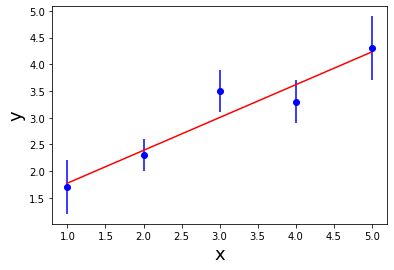

In [30]:
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.errorbar(xd, yd, yerr=yd_err, fmt="bo")
plt.plot(xf, yf, color="red")

### Calculate the $\chi^2$ per degree of freedom and p-value

In [31]:
from scipy import stats

chi2 = m.fval

n_data_points = xd.size
n_fit_parameters = 2
n_dof = n_data_points - n_fit_parameters
pvalue = 1 - stats.chi2.cdf(chi2, n_dof)

print(f"chi2/ndf = {chi2:.1f} / {n_dof}, p-value = {pvalue:.3f}")

chi2/ndf = 2.3 / 3, p-value = 0.513


### Now it is your turn: External constraint on the slope parameter
Let the measured value of $a_1$ be $0.6 \pm 0.1$

In [32]:
a1_measured = 0.6
sigma_a1 = 0.1

a) define a modified chi2 function that implements the Gaussian constraint on the slope a1

In [33]:
# your code here

# your code here
# ...

# def chi2_constr(a0, a1):
    

b) Perform a fit with iminuit using the modified chi2 function

In [34]:
# your code here


c) Plot the error ellipses for the unconstrained and the constrained fit

In [35]:
from matplotlib.patches import Ellipse

def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

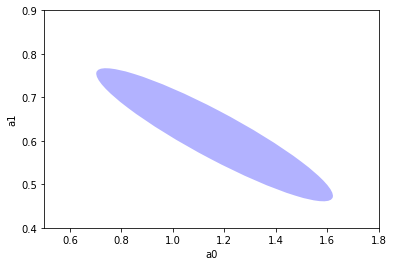

In [36]:
fig, ax = plt.subplots()
el = get_cov_ellipse(m.np_covariance(), (a0, a1), 1, fc='blue', alpha=0.3)
ax.add_artist(el)
ax.set_xlim(0.5, 1.8)
ax.set_ylim(0.4, 0.9)
plt.xlabel("a0")
plt.ylabel("a1")
plt.show()

# add erreor ellipse from constrained fit
# your code here
